In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score, make_scorer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv(r'C:\Users\Mahdi\Desktop\P\heart.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


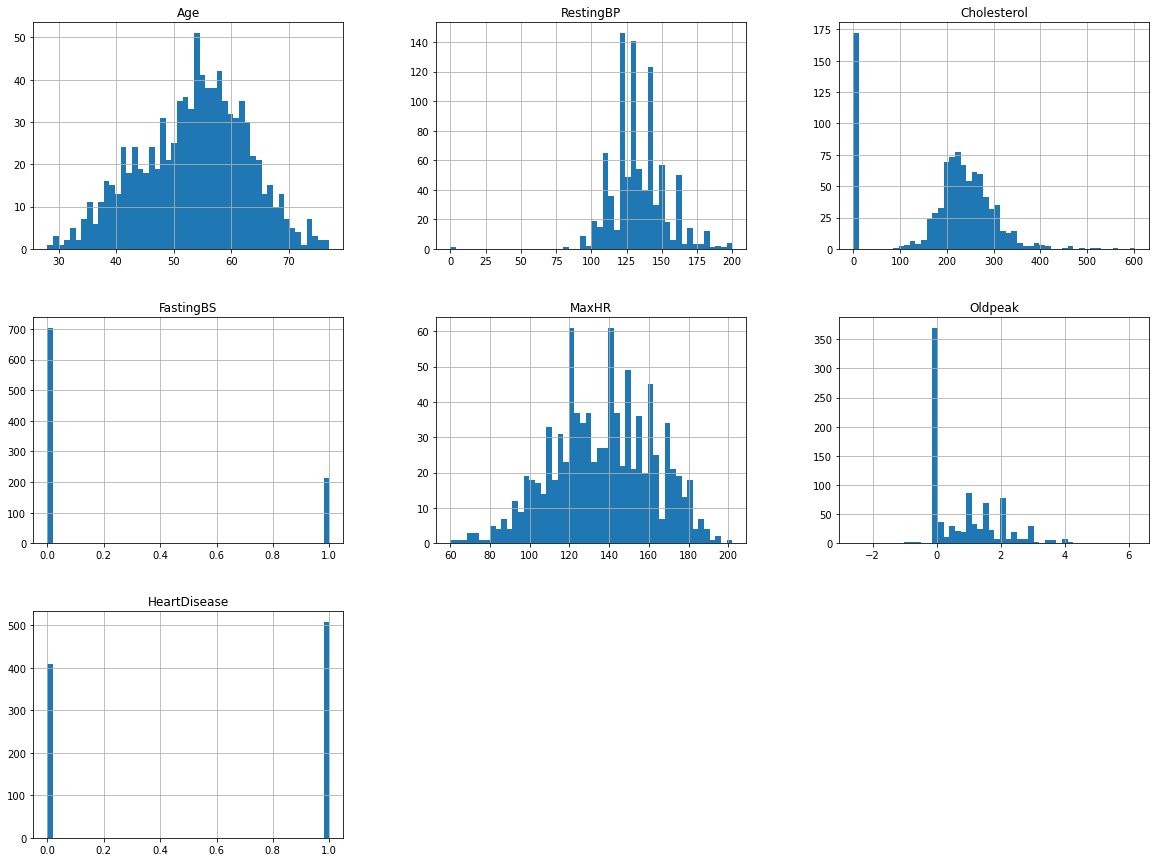

In [3]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [4]:
onehot = OneHotEncoder(handle_unknown='ignore')
label=LabelEncoder()

def str_hot(df,x):
    q=df[str(x)].value_counts()
    l=list(q.index)
    bridge_df = pd.DataFrame(df, columns=[x])
    enc_df = pd.DataFrame(onehot.fit_transform(bridge_df[[x]]).toarray(),columns=l)
    return(enc_df)


def str_label(df,x):
    q=df[str(x)].value_counts()
    l=list(q.index)
    bridge_df = pd.DataFrame(df, columns=[x])
    enc_df = pd.DataFrame(label.fit_transform(bridge_df[[x]]))
    df.drop(columns=[x],inplace=True)
    df[x]=enc_df
    return(df)


In [5]:
df=str_label(df,'Sex')
df=str_label(df,'ChestPainType')
df=str_label(df,'RestingECG')
df=str_label(df,'ST_Slope')
df=str_label(df,'ExerciseAngina')

C:\Users\Mahdi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   RestingBP       918 non-null    int64  
 2   Cholesterol     918 non-null    int64  
 3   FastingBS       918 non-null    int64  
 4   MaxHR           918 non-null    int64  
 5   Oldpeak         918 non-null    float64
 6   HeartDisease    918 non-null    int64  
 7   Sex             918 non-null    int32  
 8   ChestPainType   918 non-null    int32  
 9   RestingECG      918 non-null    int32  
 10  ST_Slope        918 non-null    int32  
 11  ExerciseAngina  918 non-null    int32  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [7]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ST_Slope,ExerciseAngina
0,40,140,289,0,172,0.0,0,1,1,1,2,0
1,49,160,180,0,156,1.0,1,0,2,1,1,0
2,37,130,283,0,98,0.0,0,1,1,2,2,0
3,48,138,214,0,108,1.5,1,0,0,1,1,1
4,54,150,195,0,122,0.0,0,1,2,1,2,0


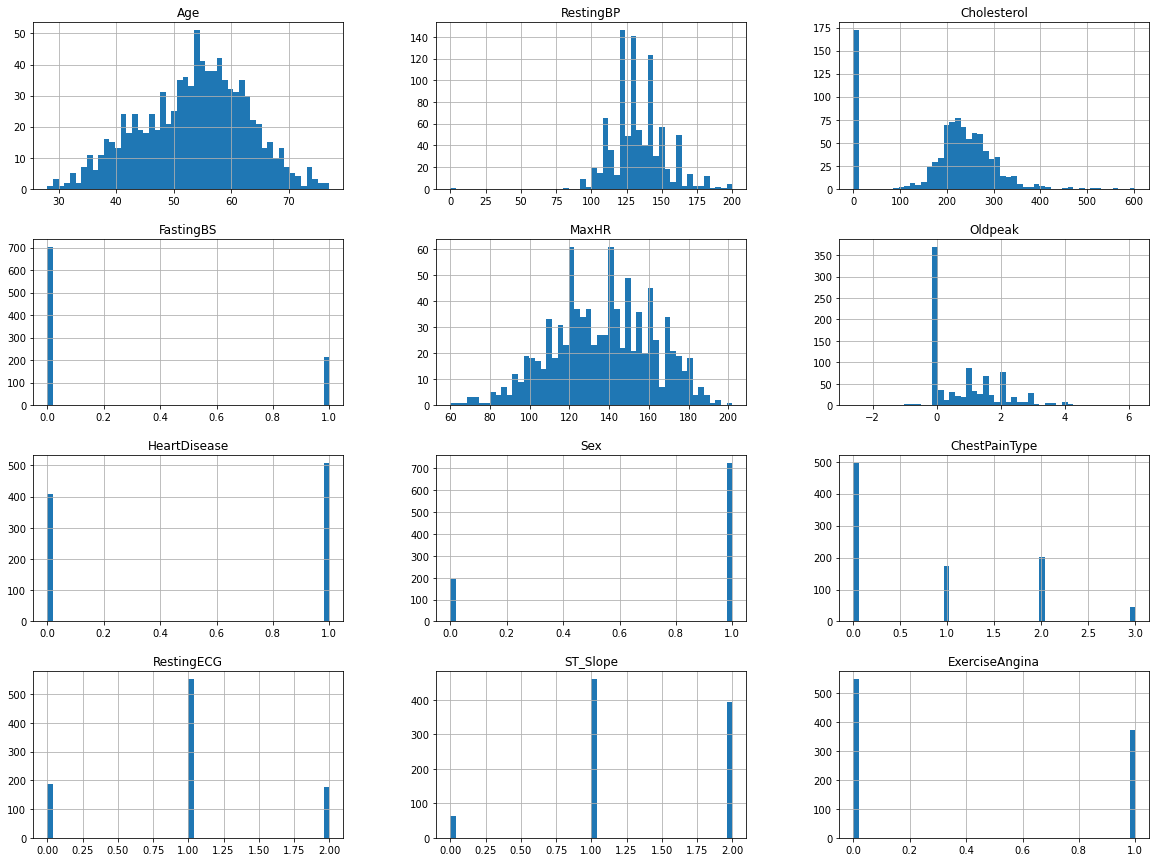

In [8]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
train_set,test_set=train_test_split(df,test_size=.2,random_state=35)
train_tar=train_set['HeartDisease']
test_tar=test_set['HeartDisease']
train_set.drop('HeartDisease',axis=1,inplace=True)
test_set.drop('HeartDisease',axis=1,inplace=True)

In [10]:
model = AdaBoostClassifier()
model.fit(train_set, train_tar)
predict = model.predict(test_set)
print(classification_report(test_tar,predict))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        78
           1       0.86      0.85      0.85       106

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



In [11]:
model = RandomForestClassifier()
model.fit(train_set, train_tar)
predict = model.predict(test_set)
print(classification_report(test_tar,predict))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83        78
           1       0.88      0.87      0.87       106

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [12]:
model = MLPClassifier()
model.fit(train_set, train_tar)
predict = model.predict(test_set)
print(classification_report(test_tar,predict))

              precision    recall  f1-score   support

           0       0.59      0.92      0.72        78
           1       0.90      0.52      0.66       106

    accuracy                           0.69       184
   macro avg       0.74      0.72      0.69       184
weighted avg       0.77      0.69      0.68       184

